Найти решение смешанной задачи для уравнения гиперболического типа на сетке $(x_m, t^n)$:

$$u''_{tt} (x,t) - u''_{xx} (x, t) = x^2 - t^2, 0 \leq x \leq 1, 0 \leq t \leq 1$$

$$u(0, t) = 0, u(1, t) = \frac{2.4}{e}, 0 \leq t \leq 1$$

$$u(x, 0) = (1.5 x^2 + 0.9)e^{-x}, u'_t(x, 0) = 0, 0 \leq x \leq 1$$

Использовать метод второго порядка аппроксимации. Начальную сетку выбрать самостоятельно. Для оценки порядка сходимости схемы дважды использовать сгущение сеток в два раза. Оценить реальную скорость сходимости.

Найти точное решение задачи. Сравнить численное решение с точным.

# Точное решение

Обозначим начальные условия: $(1.5 x^2 + 0.9)e^{-x} = \phi(x)$ и $x^2 - t^2 = f(x, t)$

Пользуясь всеми знаниями полученными из курса УМФ (1 семинар этого семестра), получим что решение данной задачи будет равно, по формуле Д'Аламбера:

$$u(x, t) = \frac{\phi(x + t) + \phi(x - t)}{2} + \frac{1}{2} \int\limits_{0}^{t} \int\limits_{x-(t-\tau)}^{x+(t-\tau)} f(s, \tau) ds d\tau$$

Взяв самостоятельно интеграл (wolfram), получаем точное решение:

$$u(x, t) = \frac{(1.5 (x+t)^2 + 0.9)e^{-(x+t)} + (1.5 (x-t)^2 + 0.9)e^{-(x-t)}}{2} + \frac{t^2 x^2}{2}$$

P.S. исправляем неверное условие из задачи:

$$u(0, t) = (1.5t^2 + 0.9) \cdot ch(t)$$

$$u(1, t) = \frac{1}{e}(1.5 (1+t^2) + 0.9) \cdot ch(t) - \frac{3t}{e} \cdot sh(t) + \frac{t^2}{2}$$

# Схема

Для решения данной смешанной задачи мы будем использовать метод конечных разностей второго порядка аппроксимации. Для этого мы сначала разобьем область нашей задачи на сетку $(x_m, t^n)$ с шагами $h$ и $\tau$ соответственно, где $x_m = mh$ и $t^n = n\tau$.

Аппроксимируем вторые производные функции $u$ по времени и по пространству следующим образом:

$$u_{tt}(x_{m},t^{n}) \approx \frac{u_{m}^{n+1}-2u_{m}^{n}+u_{m}^{n-1}}{\tau^{2}},$$

$$u_{xx}(x_{m},t^{n}) \approx \frac{u_{m+1}^{n}-2u_{m}^{n}+u_{m-1}^{n}}{h^{2}}.$$

Подставляя эти аппроксимации в уравнение и приводя подобные, получаем:

$$\frac{u_{m}^{n+1}-2u_{m}^{n}+u_{m}^{n-1}}{\tau^{2}} - \frac{u_{m+1}^{n}-2u_{m}^{n}+u_{m-1}^{n}}{h^{2}} = x_{m}^{2}-(t^n)^{2}.$$

Перенесем все известные значения на правую сторону, а неизвестное $u_{m}^{n+1}$ оставим в левой части, получим:

$$u_{m}^{n+1} = 2u_{m}^{n}-u_{m}^{n-1}+\frac{\tau^{2}}{h^{2}}(u_{m+1}^{n}-2u_{m}^{n}+u_{m-1}^{n})+\tau^{2}(x_{m}^{2}-(t^n)^{2}).$$

# Численное решение

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# функция для решения задачи на сетке с заданным шагом h и tau
def solve(h, tau):
    # определяем количество узлов на сетке
    M = int(1/h) + 1
    N = int(1/tau) + 1

    # создаем сетку
    x = np.linspace(0, 1, M)
    t = np.linspace(0, 1, N)

    # задаем начальные и граничные условия
    u = np.zeros((N, M))
    u[0, :] = (1.5 * x**2 + 0.9)*np.exp(-x)  # начальное условие
    u[:, 0] = (1.5 * t**2 + 0.9) * np.cosh(t)
    u[:, -1] = 1 / np.e * (1.5 * (1+t**2) + 0.9) * np.cosh(t) - 3 * t / np.e * np.sinh(t) + t**2 / 2  # граничное условие
    u[1, :] = u[0, :]

    # вычисляем значения на сетке с помощью явной схемы
    for n in range(1, N-1):
        for m in range(1, M-1):
            u[n+1, m] = 2*u[n, m] - u[n-1, m] + (tau**2/h**2)*(u[n, m+1] - 2*u[n, m] + u[n, m-1]) + tau**2*(x[m]**2 - t[n]**2)

    return u

# определяем начальный шаг сетки
h0 = 0.05
tau0 = 0.01

# решаем задачу на начальной сетке
u = solve(h0, tau0)

In [2]:
print (u[0, :])

[0.9        0.85967359 0.82792624 0.80368607 0.78598152 0.77393328
 0.76674686 0.76370572 0.76416485 0.76754489 0.77332659 0.78104581
 0.79028876 0.80068771 0.81191697 0.82368918 0.83575187 0.84788437
 0.85989483 0.87161758 0.88291066]


In [3]:
M = int(1/h0) + 1
N = int(1/tau0) + 1

# создаем сетку
x = np.linspace(0, 1, M)
t = np.linspace(0, 1, N)

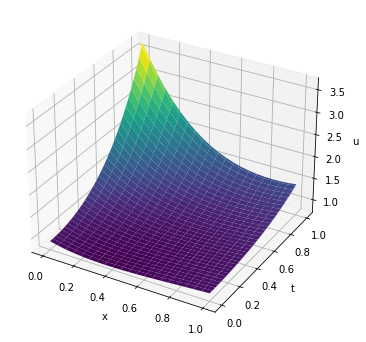

In [4]:
#строим график решения
X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, T, u, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()

In [5]:
def u_real(x, t):
    return t*t*x*x /2 + 1/2 * ((1.5*(x + t)**2 + 0.9)*np.exp(-(x+t)) + (1.5*(x - t)**2 + 0.9)*np.exp(-(x-t))) 

In [6]:
print (u_real(x, 0))

[0.9        0.85967359 0.82792624 0.80368607 0.78598152 0.77393328
 0.76674686 0.76370572 0.76416485 0.76754489 0.77332659 0.78104581
 0.79028876 0.80068771 0.81191697 0.82368918 0.83575187 0.84788437
 0.85989483 0.87161758 0.88291066]


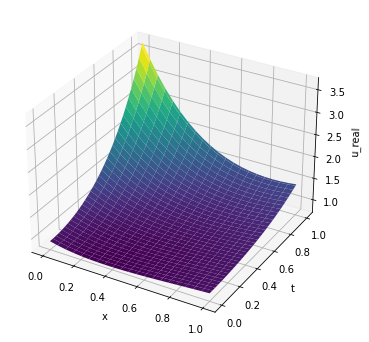

In [7]:
u_values = u_real(X, T)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, T, u_values, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u_real')
plt.show()

# Порядок сходимости

In [8]:
# уменьшаем шаг сетки в 2 раза и решаем задачу снова
h1 = h0 / 2
tau1 = tau0 / 2
u_fine = solve(h1, tau1)

# вычисляем норму разности решений на более грубой и более мелкой сетках
diff_norm = np.linalg.norm(u - u_fine[:u.shape[0], :u.shape[1]])

# повторяем процесс еще раз, чтобы получить оценку порядка сходимости
h2 = h1 / 2
tau2 = tau1 / 2
u_finer = solve(h2, tau2)

# вычисляем норму разности решений на более грубой и более мелкой сетках
diff_norm2 = np.linalg.norm(u_fine - u_finer[:u_fine.shape[0], :u_fine.shape[1]])

# оцениваем порядок сходимости
p = np.log(diff_norm2/diff_norm)/np.log(2)
print(f"Порядок сходимости: p = {p}")

Порядок сходимости: p = 0.9378378224726867
